# Support Vector Regression

Support Vector Regression(SVR) is a type of Support Vector Machine (SVM) that is commonly used for regression tasks, unlike SVM that is commonly used for classification. It was proposed by Vladimir Vapnik, Harris Drucker, Christopher J. C. Burges, Linda Kaufman and Alexander J. Smola in the 1996.

In notebook we will see some example in 2D to understand how it works and the difference with SVM but SVR is not limited to 2D data, it can be used for high-dimensional data as well and so in the last part of notebook we will see a real case study with a dataset with n-dimension(n>2).

SVR as SVM use Support Vectors that are the data points that are closest to decision boundary(or hyperplane).
This methods introduces a loss function which make regression possible, in fact it approximate the output data so that the error is within a certain threshold(ε). ε is added to the model to obtain a sparse solution, so it replace the quadratic loss function(that is common in normalized linear regression) with the ε-insensitive error function. This means that errors within a certain distance ε from the true value are not penalized.


## Introduction

In the following example we can see how use a SVM for classification, in particular a Linear SVM. It's interesting to go and understand later in the in the next code which is the difference between SVM and SVR.
To run the code we use sklearn library.

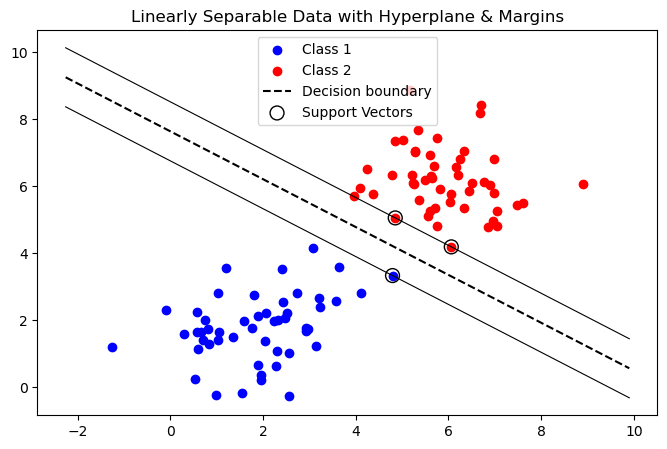

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

x1 = np.random.randn(50, 2) + np.array([2, 2])
x2 = np.random.randn(50, 2) + np.array([6, 6])
X = np.vstack((x1, x2))
y = np.hstack((np.zeros(50), np.ones(50)))

clf = SVC(kernel="linear", C=1e5)
clf.fit(X, y)

# Otteniamo i parametri dell'iperpiano
w = clf.coef_[0]
b = clf.intercept_[0]

# Funzione dell'iperpiano: w0*x + w1*y + b = 0
# Risolviamo per y = ...
xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
yy = -(w[0]/w[1]) * xx - b/w[1]

# Margini
margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up   = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

# Plot
plt.figure(figsize=(8, 5))

plt.scatter(x1[:,0], x1[:,1], color='blue', label='Class 1')
plt.scatter(x2[:,0], x2[:,1], color='red', label='Class 2')

# Linea decisionale tratteggiata
plt.plot(xx, yy, 'k--', label="Decision boundary")

# Margini
plt.plot(xx, yy_down, 'k-', linewidth=0.8)
plt.plot(xx, yy_up, 'k-', linewidth=0.8)

# Support vectors
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=100, facecolors='none', edgecolors='k', label="Support Vectors")

plt.title("Linearly Separable Data with Hyperplane & Margins")
plt.legend()



In the cose above, we generated two sets of 2D data points. The first set is linearly separable, while the second set is not linearly separable. It's a good example to highlight type of data where Linear SVM can work. It's a good example of classification problem where Linear SVM can work.
Now the problem is that not always the data are linearly separable so, in that case, We must use other type of SVM. In the follow example we can see an example of non linearly separable data.

In the preview code we can see a good example of classification but now with SVR we will see a different process.

## SVR

### Regression
Regression is a statistical and machine learning method used to predict continuous numerical values of a dependent variable from one or more independent variables, by finding a function that best approximates the relationship between inputs and outputs.

Below we can see an implementation of SVR with Linear Kernel. This s an easy example to understand how SVR works and what see a regression problem.


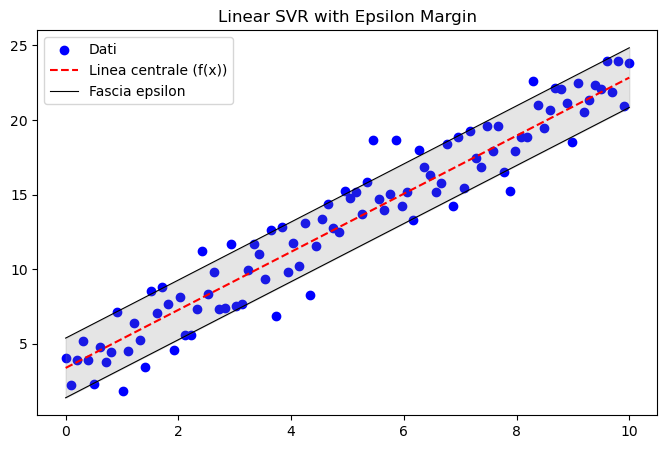

In [5]:
from sklearn.svm import SVR

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.ravel() + 3 + np.random.randn(100) * 2  # relazione lineare con rumore

svr = SVR(kernel='linear', epsilon=2)
svr.fit(X, y)

y_pred = svr.predict(X)

epsilon = svr.epsilon
y_up = y_pred + epsilon
y_down = y_pred - epsilon

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Dati')
plt.plot(X, y_pred, 'r--', label='Linea centrale (f(x))')
plt.plot(X, y_up, 'k-', linewidth=0.8, label='Fascia epsilon')
plt.plot(X, y_down, 'k-', linewidth=0.8)
plt.fill_between(X.ravel(), y_down, y_up, color='gray', alpha=0.2)
plt.legend()
plt.title("Linear SVR with Epsilon Margin")
plt.show()


It's easy implement SRV with sklearn library. In the example above we generated some 1D data with a linear relationship and some noise. We then fit a Linear SVR model to the data and plotted the results, including the epsilon margin.

The parameter $ \varepsilon $ defines the width of the epsilon-insensitive tube around the regression function.
- Small $ \varepsilon $: the model becomes more sensitive to small deviations from the true values, leading to a tighter fit to the training data.
- Large $ \varepsilon $: the model allows for larger deviations from the true values without penalty, resulting in a smoother and more generalized function.

## Mathematical Formulation
Most of the mathematical formulation are find in Bishop's book "Pattern Recognition and Machine Learning".
Linear SVR aims to find a function

\begin{gather*}
y_i = w^T \phi(x_i) + b
\end{gather*}


that approximates the data $ (x_i, y_i) $ within a tolerance $ \varepsilon $.
$\epsilon$-insensibile $E_\epsilon$ è data da:
$$E_{\epsilon}(y(\mathbf{x}) - t) = \begin{cases} 0 & \text{se } |y(\mathbf{x}) - t| < \epsilon \\ |y(\mathbf{x}) - t| - \epsilon & \text{altrimenti} \end{cases} \quad$$

Minimizing model complexity and errors outside the epsilon-insensitive tube:

\begin{gather*}
\min_{w, b, \xi_i, \xi_i^*} \quad \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} (\xi_i + \hat{\xi_i})
\end{gather*}

With:
-  $ \quad \frac{1}{2} \|w\|^2 $ : complexity of the model (we want to minimize it)
-  The second part is for the errors outside the epsilon-intensitive tube.

subject to:
- For points above the tube:    $ y_i - w^T \phi(x_i) - b \leq \varepsilon + \xi_i $
- For points below the tube:    $ w^T \phi(x_i) + b - y_i \leq \varepsilon + \hat{\xi_i} $
- Slack variables must be non-negative:     $ \xi_i, \hat{\xi_i} \geq 0 $

Where:
- $ w $ are the model weights.
- $ b $ is the bias.
- $ \varepsilon $ defines the epsilon-insensitive tube.
- $ \xi_i, \hat{\xi_i} $ are slack variables for errors outside the tube.
- $ C $ balances model complexity versus tolerance of errors.

This formulation can be write in another easy way, without the slack variables.  If the problem is not feasible, we introduce slack variables, which are the data points that fall outside of the ε-insensitive tube.
In real cases, most of time the problem is not feasible because it's very strange that all data points fall in the right way.

To minimize the objective function we can use the method of Lagrange multipliers, introducing multipliers $ \alpha_n \geq 0, \hat{\alpha_n} \geq 0 $ and $ \mu_n \geq 0, \hat{\mu_n} \geq 0 $. Now we optimize the Lagrangian:
\begin{gather*}
L = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} (\xi_i + \hat{\xi_i}) - \sum_{i=1}^{m} \alpha_i (\varepsilon + \xi_i + w^T \phi(x_i) + b - t_i) - \sum_{i=1}^{m} \hat{\alpha_i} (\varepsilon + \hat{\xi_i} - w^T \phi(x_i) + b + t_i) - \sum_{i=1}^{m} (\mu_i \xi_i + \hat{\mu_i} \hat{\xi_i})
\end{gather*}

I have change $ y_n $ with $ w^T \phi(x_i) + b $.

And now we must find the derivatives and set them to zero:
\begin{gather*}
\frac{\partial L}{\partial w} = 0 \Rightarrow w = \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) x_i \\
\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) = 0 \\
\frac{\partial L}{\partial \xi_i} = 0 \Rightarrow \alpha_i + \mu_i = C \\
\frac{\partial L}{\partial \hat{\xi_i}} = 0 \Rightarrow \hat{\alpha_i} + \hat{\mu_i} = C
\end{gather*}

Now we can substitute the derivatives in the Lagrangian and obtain the dual problem:
\begin{gather*}
\tilde{L}(\boldsymbol{a}, \hat{\boldsymbol{a}}) = -\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} (\alpha_i - \hat{\alpha_i})(\alpha_j - \hat{\alpha_j}) K(x_i, x_j) - \varepsilon \sum_{i=1}^{m} (\alpha_i + \hat{\alpha_i}) + \sum_{i=1}^{m} t_i (\alpha_i - \hat{\alpha_i})
\end{gather*}



How can we say we introduce the kernel $ K(x_i, x_j) =  \phi(x_i)^T \phi(x_j) $.
Now, we have a costrained maximization problem but we can note that we have $a_i \geq 0$ and $\hat{a_i} \geq 0$ and $ \mu_n \geq 0, \hat{\mu_n} \geq 0 $ as before. So, thanks to Laplacian derivated we have:
\begin{gather*}
0 \leq \alpha_i \leq C \\
0 \leq \hat{\alpha_i} \leq C
\end{gather*}

And I can put all in the first function that it's write in this chatper to obtain:
\begin{gather*}
y(\boldsymbol{x}) = \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) K(x_i, x) + b
\end{gather*}

with kernel function.
The corrisponding Karush-Kuhn-Tucker (KKT) conditions(that are a generalization of the method of Lagrange multipliers and thay are useful for solving optimization problems with constraints), are given by:
\begin{gather*}
\alpha_i (\varepsilon + \xi_i + w^T \phi(x_i) + b - t_i) = 0 \\
\hat{\alpha_i} (\varepsilon + \hat{\xi_i} - w^T \phi(x_i) + b + t_i) = 0 \\
(C - a_n)\xi_i = 0 \\
(C - \hat{a_n})\hat{\xi_i} = 0 \\
\end{gather*}

From that we can see that:
- $ \alpha_i \neq 0 $ if and only if $ (\varepsilon + \xi_i + w^T \phi(x_i) + b - t_i) = 0 $
    - if $ \xi_i = 0 $ then $ |y(x_i) - t_i| = \varepsilon $ (on the boundary of the tube)
    - if $ \xi_i > 0 $ then $ y(x_i) - t_i > \varepsilon $ (outside the tube)
- Same for $ \hat{\alpha_i} $
- We have $ \varepsilon $ that is strictly positive and $ \xi_i, \hat{\xi_i} $ that are non-negative
    - So we have that $ \forall x_i $, either $ \alpha_i = 0 $, $ \hat{\alpha_i} = 0 $ or both.

During the computation, we can only consider the data points for which $ \alpha_i $ or $ \hat{\alpha_i} $ are non-zero. These points are called support vectors and they define the regression function. All point that are equal to zero are in the limit of the epsilon-insensitive tube and all the point that are outside the tube have $ \alpha_i = C $ or $ \hat{\alpha_i} = C $(that we can change in our code).

To compute $ b $ we can use the KKT conditions. For any support vector $ x_i $ with $ 0 < \alpha_i < C $ or $ 0 < \hat{\alpha_i} < C $, we have $ \xi_i = 0 $ or $ \hat{\xi_i} = 0 $. So, we can rearrange the KKT conditions to solve for $ b $:
\begin{gather*}
b = t_i - w^T \phi(x_i) - \varepsilon = t_i - \varepsilon - \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) K(x_i, x) \quad \text{if } 0 < \alpha_i < C \\
b = t_i - w^T \phi(x_i) + \varepsilon = t_i + \varepsilon \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) K(x_i, x) \quad \text{if } 0 < \hat{\alpha_i} < C
\end{gather*}

## Non-linear SVR with polynomial kernel
Now we can try to use a non-linear kernel, that can be polynomial, RBF or Sigmoid kernel. Non-linear SVR can capture more complex relationships in the data compared to linear model.
The formula in the previous setting are both for linear and polynomial kernel, the only difference is the kernel function $ K(x_i, x_j) $.


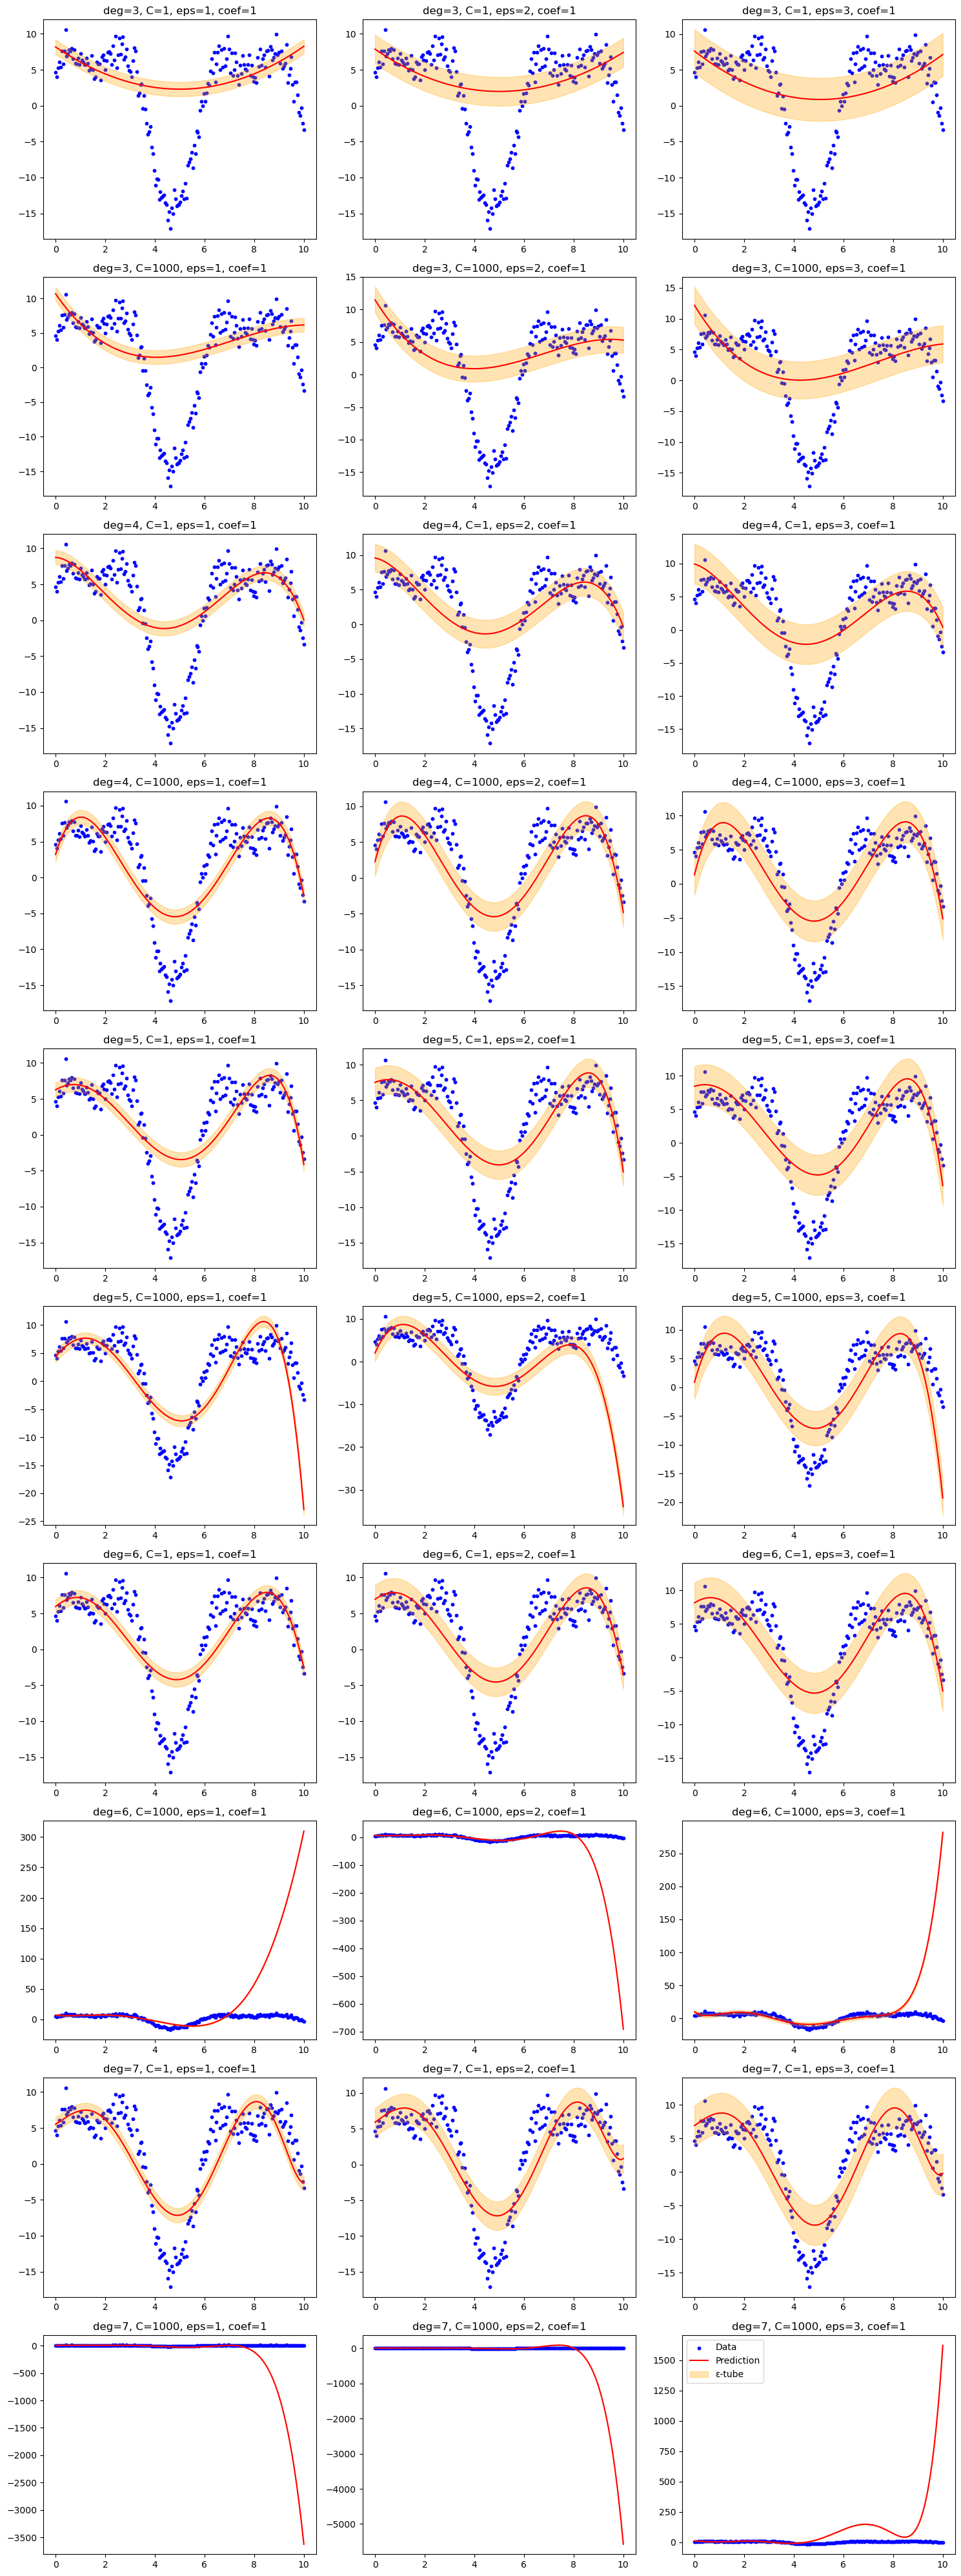

In [61]:
from itertools import product

X = np.linspace(0, 10, 200).reshape(-1, 1)
y = np.sin(X.ravel()) * 10 + np.cos(2*X.ravel()) * 5 + np.random.randn(200) * 1.5

degrees = [3, 4 ,5, 6, 7]
epsilons = [1, 2, 3]
c = [1, 1000]
coefs = [1]

combinations = list(product(degrees, c, epsilons, coefs))

n = len(combinations)
cols = 3
rows = int(np.ceil(n / cols))
plt.figure(figsize=(5*cols, 4*rows))

for idx, (deg, c, eps, coef) in enumerate(combinations, 1):
    svr_poly = SVR(kernel='poly', degree=deg, C=c, epsilon=eps, coef0=coef)
    svr_poly.fit(X, y)

    y_pred = svr_poly.predict(X)
    y_up = y_pred + svr_poly.epsilon
    y_down = y_pred - svr_poly.epsilon

    plt.subplot(rows, cols, idx)
    plt.scatter(X, y, color='blue', s=10, label='Data')
    plt.plot(X, y_pred, color='red', label='Prediction')
    plt.fill_between(X.ravel(), y_down, y_up, color='orange', alpha=0.3, label='ε-tube')
    plt.title(f"deg={deg}, C={c}, eps={eps}, coef={coef}")
    plt.tight_layout()

plt.legend()
plt.show()

You can see that with polynomial kernel we can capture more complex relationships in the data. The parameter $ degree $ controls the flexibility of the polynomial kernel: higher degrees allow the model to fit more complex patterns but also increase the risk of overfitting. In fact, with a very high degree, the model may fit the noise in the training data instead of the underlying trend, leading to poor generalization on new data.
$ coef0 $ shifts the polynomial kernel, allowing lower-degree terms to influence the model and making it more flexible.
If you want you can try to change some parameters like $ C $ and epsilon to see how they affect the model.
The parameter $ C $ in an SVR controls the trade-off between model complexity and training error.
- Small $ C $: the model becomes “softer,” meaning it allows more errors to keep a larger margin or simpler function. This can help prevent overfitting but may increase training error.
- Large $ C $: the model tries to minimize training errors, even if this means a narrower margin or more complex function. This can improve accuracy on the training set but increases the risk of overfitting on new data.

This is the formula: $$
K(x, x') = (\gamma \langle x, x' \rangle + \text{coef0})^{d}
$$

It's interesting see all the difference all the plot above. In some case we have overfitting, in other case underfitting and in other case a good fit. It's important to find a right set up with a good trade off.

You can try to change the parameters of $ c, degree, epsilon $ and $ coef0 $ to see how they affect the model. Remember that the time of computation can increase with the increase of the parameters.

There are other type of kernel that We can try like RBF kernel or Sigmoid kernel.




## RBF Kernel

The RBF kernel (Radial Basis Function) measures similarity between points based on their distance from each other. “Radial” means the function depends only on the distance from a center and “basis function” refers to using these localized bumps to build the model. The parameter gamma controls how quickly similarity decreases: large gamma makes the model focus on nearby points (more complex), small gamma makes it smoother and more global.
If gamma is too large, the model may overfit the training data, capturing noise instead of the underlying pattern. If gamma is too small, the model may underfit, failing to capture important patterns in the data.

The formula for the RBF kernel is:
$$ K(x_i, x_j) = \exp\left(-\gamma \, \lVert x_i - x_j \rVert^2 \right) $$


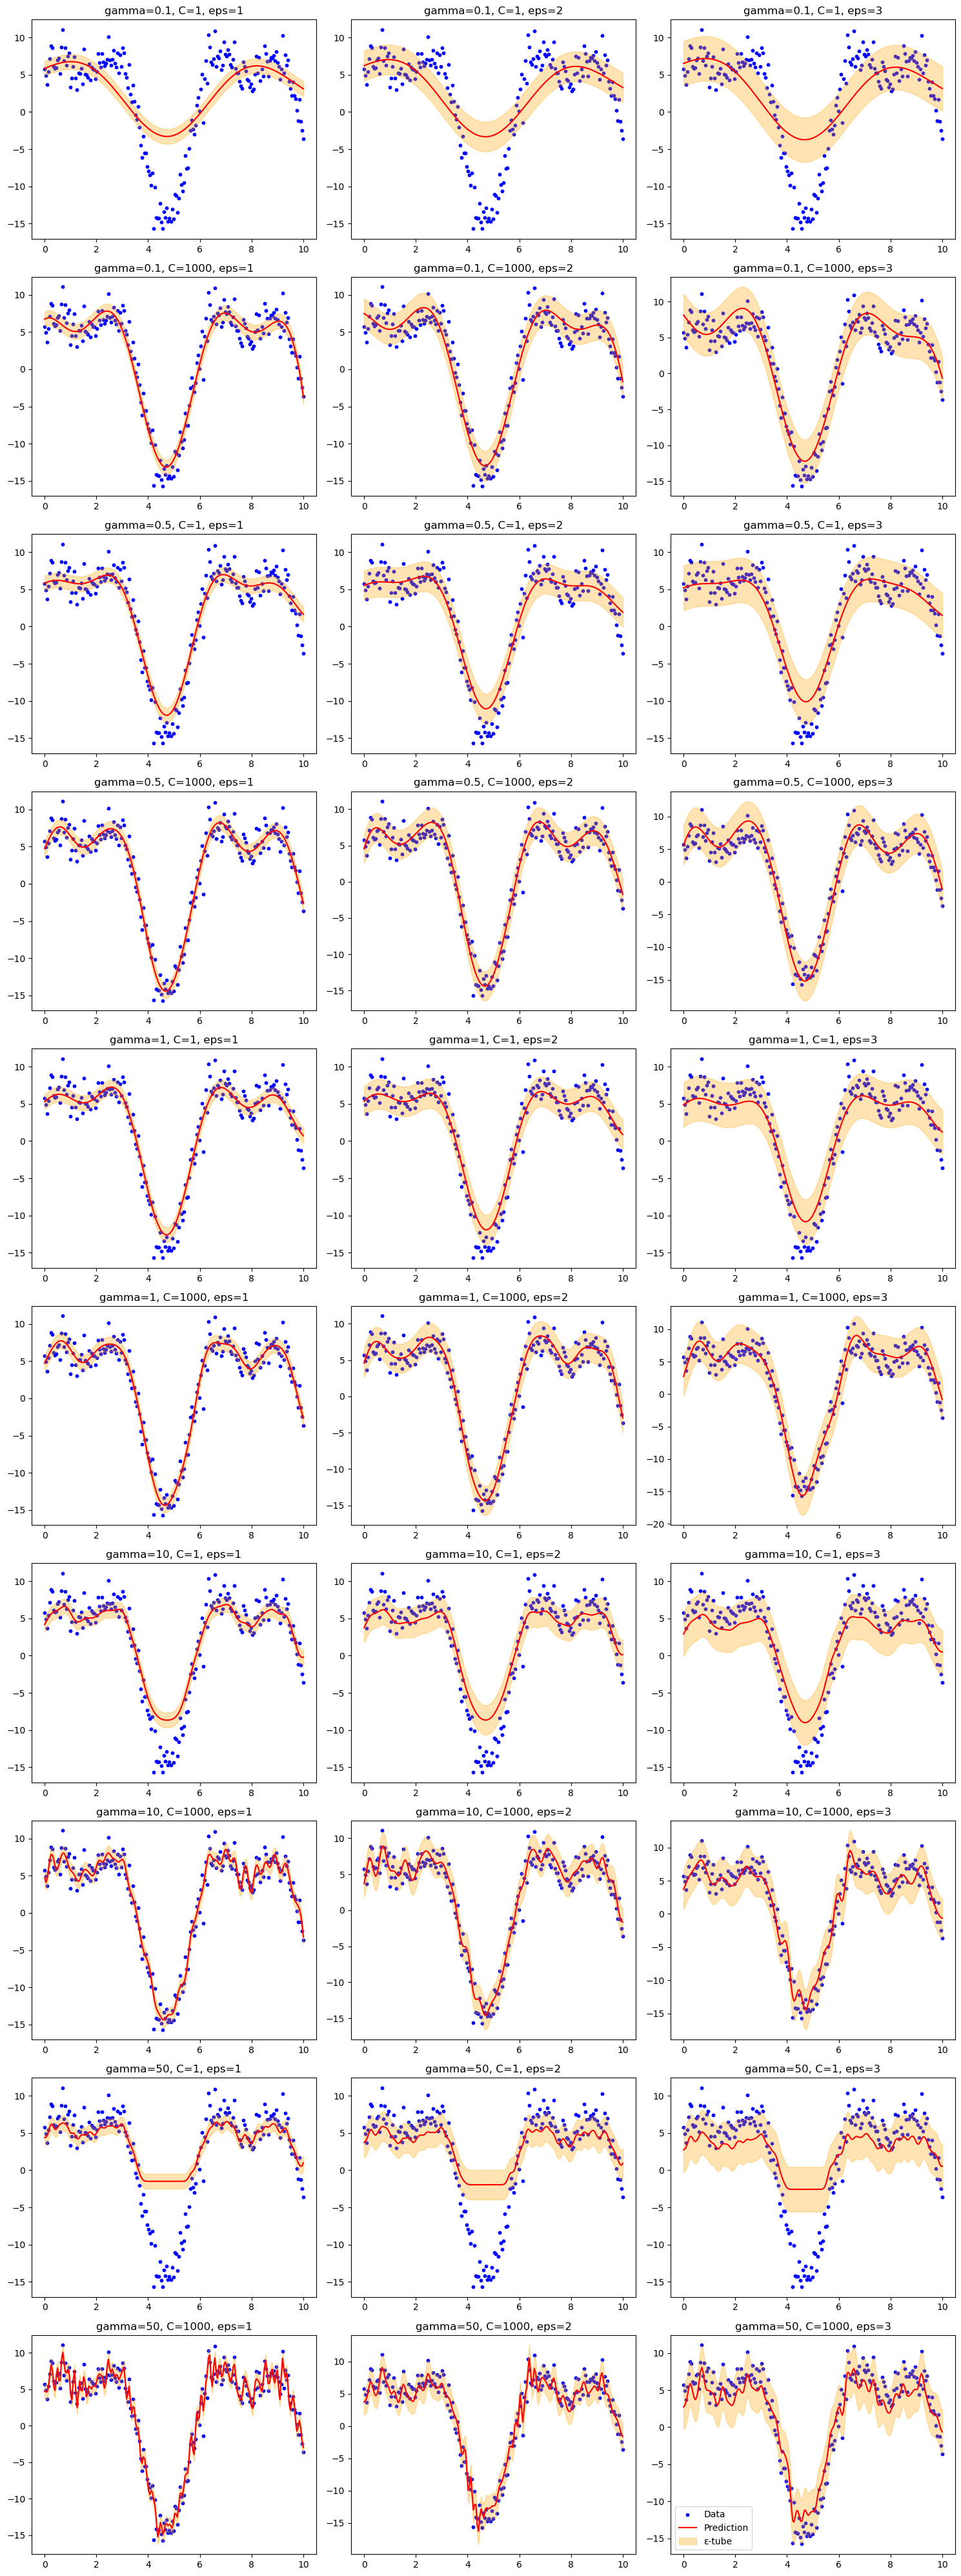

In [67]:
X = np.linspace(0, 10, 200).reshape(-1, 1)
y = np.sin(X.ravel()) * 10 + np.cos(2*X.ravel()) * 5 + np.random.randn(200) * 1.5

epsilons = [1, 2, 3]
c = [1, 1000]
gamma = [0.1, 0.5, 1, 10, 50]

combinations = list(product(gamma, c, epsilons))

n = len(combinations)
cols = 3
rows = int(np.ceil(n / cols))
plt.figure(figsize=(5*cols, 4*rows))
for idx, (gamma, C, eps) in enumerate(combinations, 1):
    svr_rbf = SVR(kernel='rbf', C=C, epsilon=eps, gamma=gamma)
    svr_rbf.fit(X, y)

    # Predizione
    y_pred = svr_rbf.predict(X)

    # Fascia epsilon
    epsilon = svr_rbf.epsilon
    y_up = y_pred + epsilon
    y_down = y_pred - epsilon

    plt.subplot(rows, cols, idx)
    plt.scatter(X, y, color='blue', s=10, label='Data')
    plt.plot(X, y_pred, color='red', label='Prediction')
    plt.fill_between(X.ravel(), y_down, y_up, color='orange', alpha=0.3, label='ε-tube')
    plt.title(f"gamma={gamma}, C={C}, eps={eps}")
    plt.tight_layout()

plt.legend()
plt.show()


This is a good example because give us some important information. First is that for example if $ gamma $ is too high we have overfitting, in fact the model fit all the data but it's not a good model because it fit also the noise. If $ gamma $ is too low we have underfitting, in fact the model is not able to capture the trend of the data. This is not the only things that affect the data because there is also $ C $ that affect the model. We can see clearly in the last two example, with gamma = 50 that whit C=1 we have a wrong function because don't capture the low peak but with C=1000 We have an overfitting of the data because take too much informaition like noise and we can see better than the previous example but the fuction it's too dirty.


## Sigmoid Kernel
The Sigmoid kernel is inspired by neural networks and is defined as:
$$ K(x_i, x_j) = \tanh(\gamma \langle x_i, x_j \rangle + \text{coef0}) $$
It can model complex relationships but is less commonly used than RBF or polynomial kernels. The parameters gamma and coef0 control the shape of the kernel, affecting model flexibility and fit.

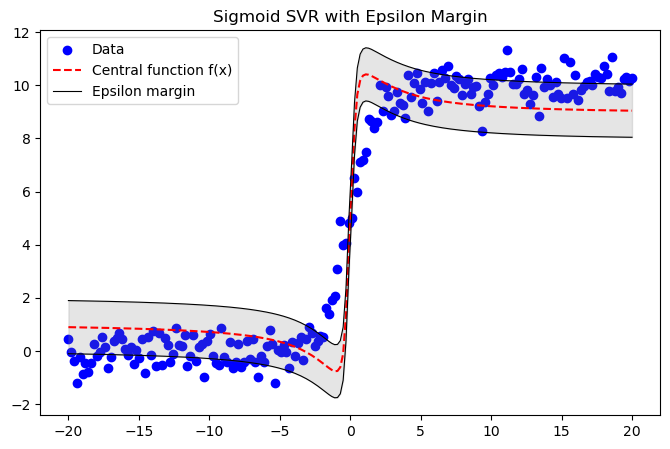

In [128]:
X = np.linspace(-20, 20, 200).reshape(-1, 1)
y = 10 / (1 + np.exp(-X.ravel())) + np.random.randn(200) * 0.5

# Modello SVR con kernel Sigmoid
svr_sigmoid = SVR(kernel='sigmoid', C=0.1, epsilon=1, gamma=0.1, coef0=1)

svr_sigmoid.fit(X, y)

# Predizione
y_pred = svr_sigmoid.predict(X)

# Fascia epsilon
epsilon = svr_sigmoid.epsilon
y_up = y_pred + epsilon
y_down = y_pred - epsilon

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, 'r--', label='Central function f(x)')
plt.plot(X, y_up, 'k-', linewidth=0.8, label='Epsilon margin')
plt.plot(X, y_down, 'k-', linewidth=0.8)
plt.fill_between(X.ravel(), y_down, y_up, color='gray', alpha=0.2)
plt.legend()
plt.title("Sigmoid SVR with Epsilon Margin")
plt.show()


I try to find I good fit with the data that i have. The type of data are different respect to the previous example. In this case the data have a sigmoid shape so I try to use a sigmoid kernel. The parameters that I use are:
- C=0.1: it's a small value that allow a more flexible model that can capture the trend of the data.
- epsilon=1: it's a moderate value that allow some tolerance to errors, balancing fit and generalization.
- gamma=0.1: it's a small value that make the model more global and less sensitive to individual data points.
- coef0=1: it's a moderate value that balances the influence of higher-order and lower-order terms in the kernel function.

I use this parameter but you can try to change them to see how they affect the model.
For example you can see easily how this model is complex, for example you can change C with an higher value and you can see the changes(you just need to change C=0.2).


## Sigmoid Kernel


## Real Case Study
Now we can see a real case study with a dataset. We can try with different type of kernel over dataset.
The dataset that we use are:
- Metro_Interstate_traffic_Volume.csv: It have 9 columns and 48204 rows. The target is traffic_volume.
- Used_Car_Price_Prediction.csv: It have 10 columns and 1000 rows. The target is sale_price.
- Fish.csv: It have 7 columns and 159 rows. The target is Weight.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

# Caricamento dataset
df = pd.read_csv('./data/Used_Car_Price_Prediction.csv')
data = df['sale_price'].dropna().values   # tolgo eventuali NaN
data = np.sort(data).reshape(-1, 1)       # colonna ordinata

# Creazione asse x (indici)
x = np.arange(len(data)).reshape(-1, 1)

# Normalizzazione
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(data)

# Modello SVR
svr_poly = SVR(kernel='poly', degree=4, C=100, epsilon=0.05, coef0=1)
svr_poly.fit(x_scaled, y_scaled.ravel())

# Predizione (su scala normalizzata)
y_pred_scaled = svr_poly.predict(x_scaled)

# Ritorno alla scala originale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_up = scaler_y.inverse_transform((y_pred_scaled + svr_poly.epsilon).reshape(-1, 1))
y_down = scaler_y.inverse_transform((y_pred_scaled - svr_poly.epsilon).reshape(-1, 1))

# Plot
plt.figure(figsize=(10,6))
plt.scatter(x, data, color='blue', s=10, alpha=0.6, label='Data')
plt.plot(x, y_pred, 'r--', linewidth=2, label='SVR Prediction')
plt.plot(x, y_up, 'k-', linewidth=0.8, label='Epsilon margin')
plt.plot(x, y_down, 'k-', linewidth=0.8)
plt.fill_between(x.ravel(), y_down.ravel(), y_up.ravel(), color='gray', alpha=0.2)
plt.legend()
plt.title("Polynomial SVR with Normalized Data")
plt.xlabel("Index (sorted cars)")
plt.ylabel("Sale Price")
plt.show()
